Develop a model to predict individual medical insurance charges based on personal
attributes.
Dataset Overview:
The dataset contains 1,338 records with the following features:
• age: Age of the individual
• sex: Gender (male/female)
• bmi: Body Mass Index
• children: Number of children covered by insurance
• smoker: Smoking status (yes/no)
• region: Residential region in the U.S. (northeast, southeast, southwest,
northwest)
• charges: Medical insurance charges (target variable)

In [ ]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder #for feature engineering
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error # for␣evaluating ml models

In [ ]:
#loading the dataset
df=pd.read_csv('/content/insurance.csv')
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# checking the data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# checking unique values
df.nunique()

,0
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


In [ ]:
# checking duplicate values
df.duplicated().value_counts()
# droping duplicate values
df.drop_duplicates(inplace=True)

In [ ]:
# rows, columns
df.shape

(1337, 7)

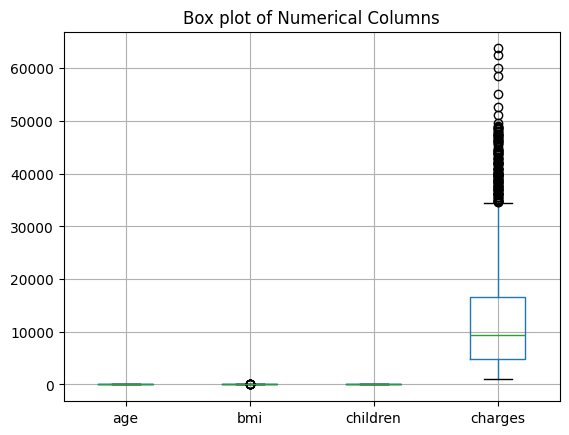

In [ ]:
#check for outliers
# Visualize box plots for numerical columns
df.boxplot(column=['age', 'bmi', 'children', 'charges'])
plt.title('Box plot of Numerical Columns')
plt.show()

In [ ]:
# Handling outliers
# Remove outliers based on a specific threshold
df_cleaned = df[(df['charges'] < 21000) & (df['bmi'] < 46)]

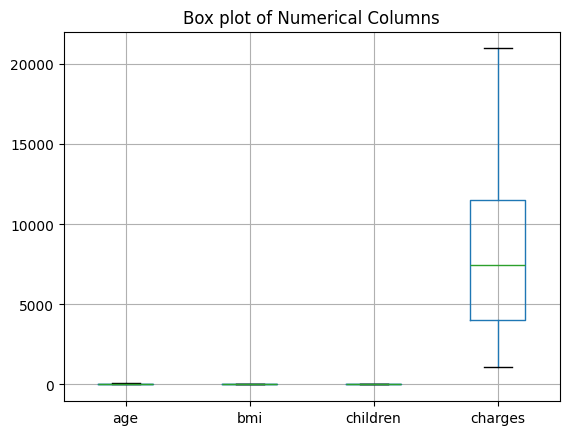

In [ ]:
# visualize boxplot after removing outliers
df_cleaned.boxplot(column=['age', 'bmi', 'children', 'charges'])
plt.title('Box plot of Numerical Columns')
plt.show()

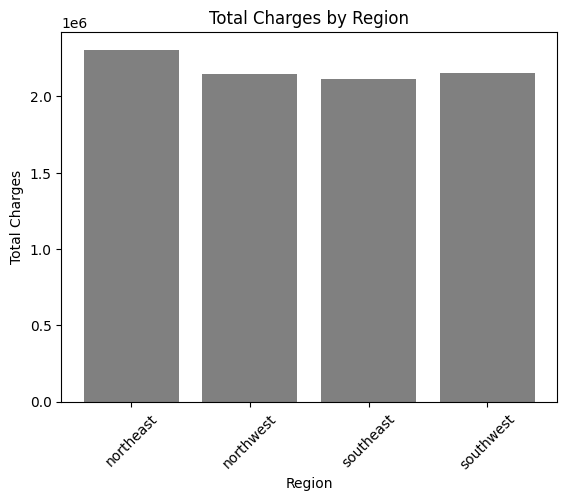

In [ ]:
# Calculate the total charges by region
charges_by_region = df_cleaned.groupby('region')['charges'].sum()

# Create a bar chart
plt.bar(charges_by_region.index, charges_by_region.values, color='grey')

# Add labels and title
plt.xlabel('Region')

plt.ylabel('Total Charges')
plt.title('Total Charges by Region')

# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=45)

# Display the chart
plt.show()

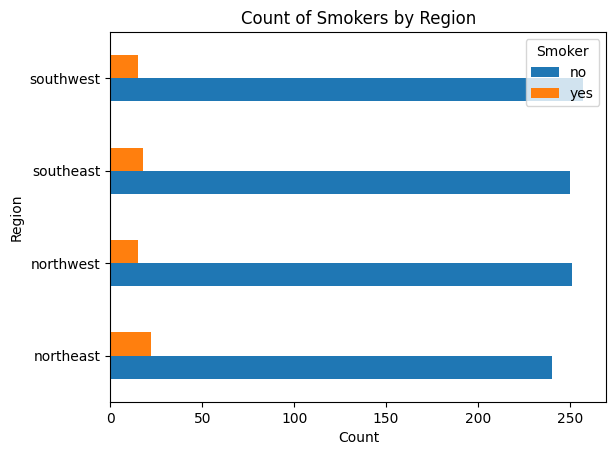

In [ ]:
smokers_by_region = df_cleaned.groupby('region')['smoker'].value_counts().unstack().fillna(0)
smokers_by_region.plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Region')
plt.title('Count of Smokers by Region')
plt.legend(title='Smoker', loc='upper right')
plt.show()

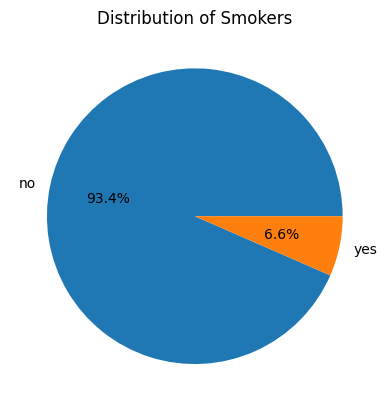

In [ ]:
smoker_counts = df_cleaned['smoker'].value_counts()
plt.pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Smokers')
plt.show()

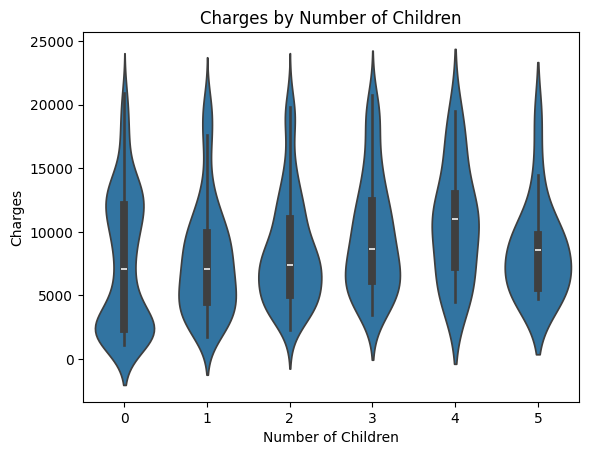

In [ ]:
sns.violinplot(x=df_cleaned['children'], y=df_cleaned['charges'])

plt.xlabel('Number of Children')
plt.ylabel('Charges')

plt.title('Charges by Number of Children')
plt.show()

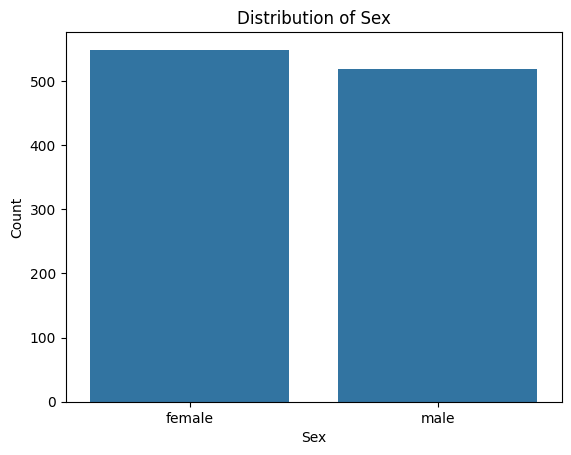

In [ ]:
sns.countplot(x='sex', data=df_cleaned)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex')
plt.show()

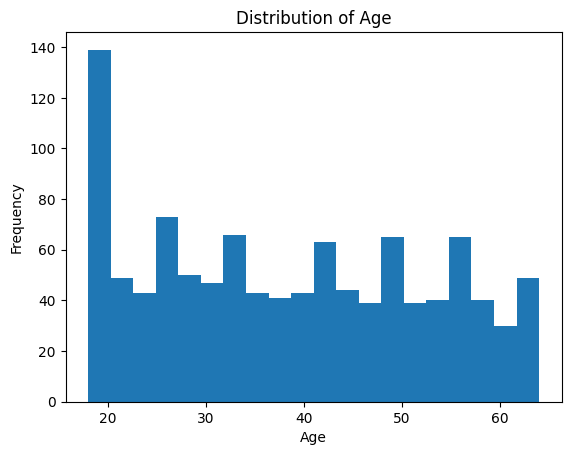

In [ ]:
# distribution of age using histogram
df_cleaned['age'].plot(kind='hist', bins=20)

plt.xlabel('Age')
plt.title('Distribution of Age')

plt.show()

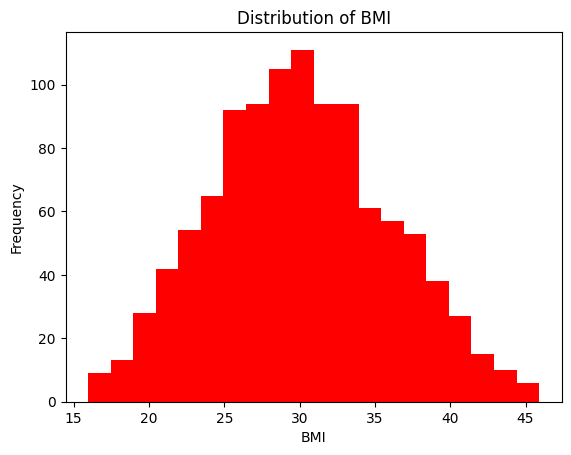

In [ ]:
# distribution of BMI using histogram
df_cleaned['bmi'].plot(kind='hist', bins=20, color='r')
plt.xlabel('BMI')
plt.title('Distribution of BMI')
plt.show()

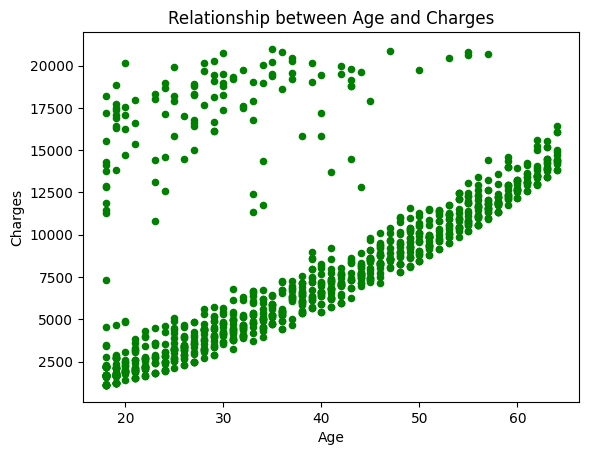

In [ ]:
# relationship between age and charges using scatterplot
df_cleaned.plot(kind='scatter', x='age', y='charges', color='g')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Relationship between Age and Charges')
plt.show()

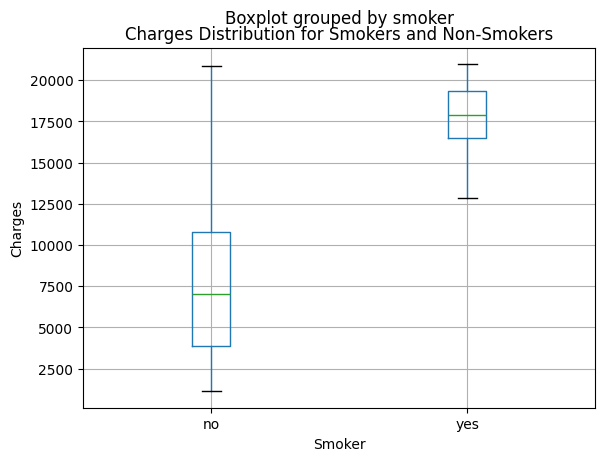

In [ ]:
# charges distribution for smokers vs non-smokers using boxplot
df_cleaned.boxplot(column='charges', by='smoker')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Charges Distribution for Smokers and Non-Smokers')
plt.show()

In [ ]:
#Feature Engineering

In [ ]:
#Creating new feature such as Age groups
df_cleaned['age_group'] = pd.cut(df_cleaned['age'], bins=[0, 25, 40, 60, df_cleaned['age'].max()], labels=['Young', 'Adult', 'Middle-aged', 'Senior'])
df_cleaned.sample(5)

/tmp/ipython-input-21-1081965225.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['age_group'] = pd.cut(df_cleaned['age'], bins=[0, 25, 40, 60, df_cleaned['age'].max()], labels=['Young', 'Adult', 'Middle-aged', 'Senior'])


,age,sex,bmi,children,smoker,region,charges,age_group
149,19,male,28.40,1,no,southwest,1842.5190,Young
575,58,female,27.17,0,no,northwest,12222.8983,Middle-aged
304,57,female,38.00,2,no,southwest,12646.2070,Middle-aged
1115,55,male,32.67,1,no,southeast,10807.4863,Middle-aged
129,38,male,34.70,2,no,southwest,6082.4050,Adult


Feature encoding - Handling categorical variables
One-hot encoding for the 'region' column

In [ ]:
df_encoded = pd.get_dummies(df_cleaned, columns=['region'], prefix='region', dtype=int)
df_encoded.sample(5)

,age,sex,bmi,children,smoker,charges,age_group,region_northeast,region_northwest,region_southeast,region_southwest
21,30,female,32.400,1,no,4149.73600,Adult,0,0,0,1
942,18,female,40.185,0,no,2217.46915,Young,1,0,0,0
199,64,female,39.330,0,no,14901.51670,Senior,1,0,0,0
1011,43,male,20.130,2,yes,18767.73770,Middle-aged,0,0,1,0
496,31,female,23.600,2,no,4931.64700,Adult,0,0,0,1


In [ ]:
#Label encoding for the 'smoker', 'sex' column
label_encoder = LabelEncoder()
df_encoded['smoker_encoded'] = label_encoder.fit_transform(df_encoded['smoker'])
df_encoded.sample(5)

,age,sex,bmi,children,smoker,charges,age_group,region_northeast,region_northwest,region_southeast,region_southwest,smoker_encoded
639,56,male,33.660,4,no,12949.15540,Middle-aged,0,0,1,0,0
1213,52,female,33.300,2,no,10806.83900,Middle-aged,0,0,0,1,0
981,34,male,21.375,0,no,4500.33925,Adult,1,0,0,0,0
564,18,female,32.120,2,no,2801.25880,Young,0,0,1,0,0
409,32,male,30.030,1,no,4074.45370,Adult,0,0,1,0,0


In [ ]:
df_encoded['sex_encoded'] = label_encoder.fit_transform(df_encoded['sex'])
df_encoded.sample(5)

,age,sex,bmi,children,smoker,charges,age_group,region_northeast,region_northwest,region_southeast,region_southwest,smoker_encoded,sex_encoded
1151,58,female,36.48,0,no,12235.8392,Middle-aged,0,1,0,0,0,0
699,23,female,39.27,2,no,3500.6123,Young,0,0,1,0,0,0
162,54,male,39.60,1,no,10450.5520,Middle-aged,0,0,0,1,0,1
1329,52,male,38.60,2,no,10325.2060,Middle-aged,0,0,0,1,0,1
1103,58,male,36.08,0,no,11363.2832,Middle-aged,0,0,1,0,0,1


In [ ]:
df_encoded = df_encoded[[x for x in df_encoded.columns if x not in ['smoker', 'sex']]]
df_encoded.sample(5)

,age,bmi,children,charges,age_group,region_northeast,region_northwest,region_southeast,region_southwest,smoker_encoded,sex_encoded
1157,23,23.18,2,14426.07385,Young,0,1,0,0,0,0
608,28,26.98,2,4435.09420,Adult,1,0,0,0,0,1
721,53,36.60,3,11264.54100,Middle-aged,0,0,0,1,0,1
761,23,35.20,1,2416.95500,Young,0,0,0,1,0,1
151,48,29.70,0,7789.63500,Middle-aged,0,0,1,0,0,1


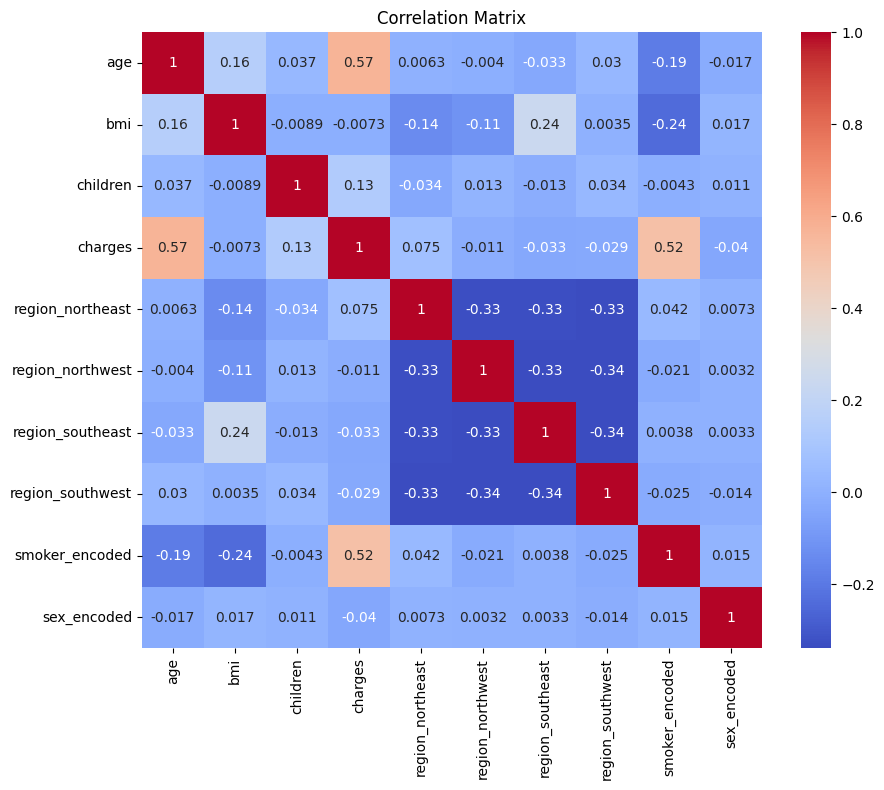

Relevant features based on correlation:
['age', 'smoker_encoded']


In [ ]:
#correlation checking
numr_cols = [x for x in df_encoded.columns if x not in ['age_group']]
corr_matrix = df_encoded[numr_cols].corr()

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Identify relevant features based on correlation
threshold = 0.3
relevant_features = corr_matrix[(corr_matrix['charges'].abs() > threshold) & (corr_matrix.index != 'charges')].index.tolist()
print("Relevant features based on correlation:")
print(relevant_features)

In [ ]:
#Only age and smoking turned out to be relevant feature based on correlation analysis

In [ ]:
#model
# Select the relevant features
X = df_encoded[['age', 'smoker_encoded']]
y = df_encoded['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



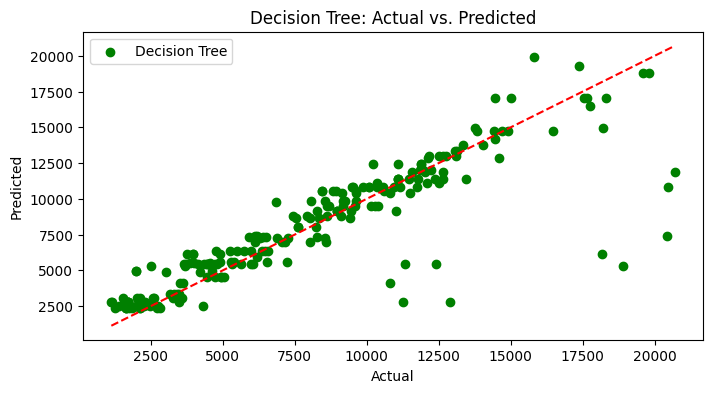

In [ ]:
# Decision Tree
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_mae = mean_absolute_error(y_test, dt_predictions)

# Plot actual vs. predicted values for Decision Tree
plt.figure(figsize=(8, 4))
plt.scatter(y_test, dt_predictions, color='green', label='Decision Tree')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Decision Tree: Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

# Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)

In [ ]:
# Print the evaluation metrics
print("Decision Tree - MSE: ", dt_mse)
print("Decision Tree - MAE: ", dt_mae)
print("Random Forest - MSE: ", rf_mse)
print("Random Forest - MAE: ", rf_mae)


Decision Tree - MSE:  5728632.311218643
Decision Tree - MAE:  1275.0243094744608
Random Forest - MSE:  5700043.4368266305
Random Forest - MAE:  1268.3820529132793


In [ ]:
# Decision Tree
print("Decision Tree:")

# Feature importances
importance = dt_model.feature_importances_

for i, feature in enumerate(X.columns):
    print(f"{feature}: {importance[i]}")

print()

# Random Forest
print("Random Forest:")

# Feature importances
importance = rf_model.feature_importances_

for i, feature in enumerate(X.columns):
    print(f"{feature}: {importance[i]}")

print()

Decision Tree:
age: 0.6283321204573399
smoker_encoded: 0.37166787954265995

Random Forest:
age: 0.6098014733409558
smoker_encoded: 0.39019852665904414



In [ ]:
#Age has higher importance than smoking in all three models.

In [ ]:
# Example input for prediction
new_data = pd.DataFrame({'age': [30], 'smoker_encoded': [1]})

# Decision Tree
dt_predictions = dt_model.predict(new_data)
print("Decision Tree Predictions:", dt_predictions)

# Random Forest
rf_predictions = rf_model.predict(new_data)
print("Random Forest Predictions:", rf_predictions)

Decision Tree Predictions: [19323.2621875]
Random Forest Predictions: [19277.84245098]
